In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('WFC.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,0.882813,0.880208,0.880208,0.152143,249600
1,1972-06-02,0.882813,0.890625,0.882813,0.882813,0.152593,172800
2,1972-06-05,0.882813,0.895833,0.880208,0.895833,0.154844,302400
3,1972-06-06,0.895833,0.911458,0.893229,0.895833,0.154844,196800
4,1972-06-07,0.895833,0.895833,0.888021,0.888021,0.153493,48000


In [3]:
df_close_shifted = df['Close'].shift()
df['Prev_Close'] = df_close_shifted

In [4]:
df.shape

(12563, 8)

In [5]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Prev_Close    1
dtype: int64

In [6]:
df.dropna(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
1,1972-06-02,0.882813,0.890625,0.882813,0.882813,0.152593,172800,0.880208
2,1972-06-05,0.882813,0.895833,0.880208,0.895833,0.154844,302400,0.882813
3,1972-06-06,0.895833,0.911458,0.893229,0.895833,0.154844,196800,0.895833
4,1972-06-07,0.895833,0.895833,0.888021,0.888021,0.153493,48000,0.895833
5,1972-06-08,0.888021,0.895833,0.885417,0.890625,0.153943,144000,0.888021
...,...,...,...,...,...,...,...,...
12558,2022-03-18,50.849998,51.540001,50.040001,51.419998,51.419998,60949500,51.480000
12559,2022-03-21,51.660000,51.799999,50.610001,51.139999,51.139999,23411500,51.419998
12560,2022-03-22,52.410000,54.200001,52.299999,53.389999,53.389999,28625600,51.139999
12561,2022-03-23,52.759998,53.049999,51.099998,51.119999,51.119999,27988700,53.389999


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
1,1972-06-02,0.882813,0.890625,0.882813,0.882813,0.152593,172800,0.880208
2,1972-06-05,0.882813,0.895833,0.880208,0.895833,0.154844,302400,0.882813
3,1972-06-06,0.895833,0.911458,0.893229,0.895833,0.154844,196800,0.895833
4,1972-06-07,0.895833,0.895833,0.888021,0.888021,0.153493,48000,0.895833
5,1972-06-08,0.888021,0.895833,0.885417,0.890625,0.153943,144000,0.888021
...,...,...,...,...,...,...,...,...
12558,2022-03-18,50.849998,51.540001,50.040001,51.419998,51.419998,60949500,51.480000
12559,2022-03-21,51.660000,51.799999,50.610001,51.139999,51.139999,23411500,51.419998
12560,2022-03-22,52.410000,54.200001,52.299999,53.389999,53.389999,28625600,51.139999
12561,2022-03-23,52.759998,53.049999,51.099998,51.119999,51.119999,27988700,53.389999


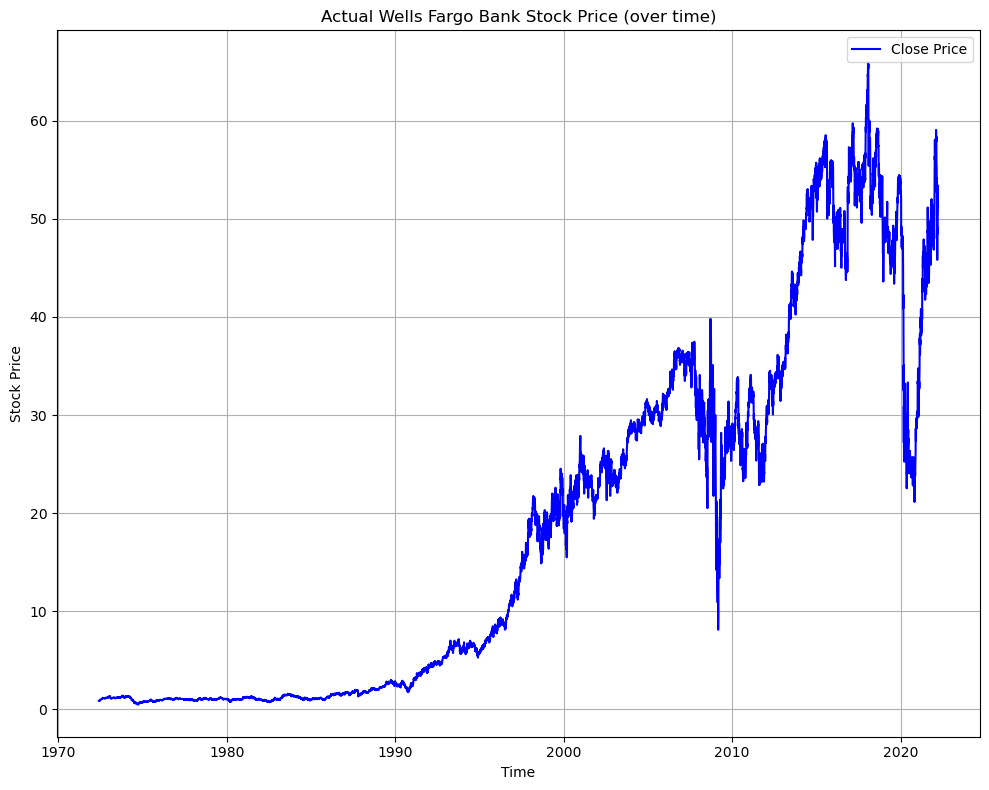

In [8]:
# Actual Close Price
plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Actual Wells Fargo Bank Stock Price (over time)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [9]:
x = df[['Open', 'Prev_Close', 'High', 'Low', 'Volume']]
y = df['Close']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
print(x_train.shape, x_test.shape)

(10677, 5) (1885, 5)


In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
print(model.coef_)
print(model.intercept_)

[-4.96308154e-01 -1.05349113e-01  7.92041077e-01  8.09421312e-01
  4.88028215e-10]
0.0060478084847659375


In [13]:
y_pred_test = model.predict(x_test)
x_test.shape

(1885, 5)

In [14]:
y_pred_test.shape

(1885,)

In [15]:
_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test})
print(_df)

          Actual  Predicted
10095  30.520000  30.385923
1625    1.052083   1.057988
3976    1.854167   1.857389
9004   30.080000  30.130481
2477    0.869792   0.879701
...          ...        ...
2418    1.000000   1.003711
6920   21.562500  21.704984
4435    2.500000   2.522518
1433    0.932292   0.929851
2380    1.000000   0.997677

[1885 rows x 2 columns]


In [16]:
model.score(x_test, y_test)

0.9998878620404104

In [17]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred_test)))

Mean Absolute Error (MAE):  0.09790574539298028
Mean Squared Error (MSE):  0.03659243778771607
Root Mean Squared Error (RMSE):  0.31289893798634133


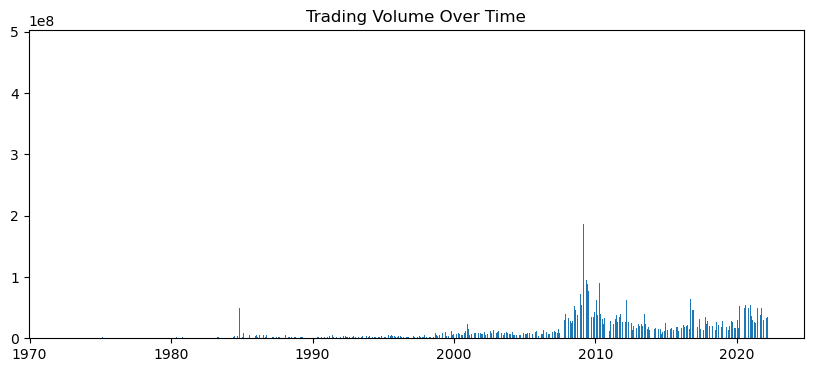

In [29]:
# Analyzes how trading volume changes with price movements to understand market participation and strength of trends

plt.figure(figsize=(10,4))
plt.bar(df['Date'], df['Volume'])
plt.title("Trading Volume Over Time")
plt.show()


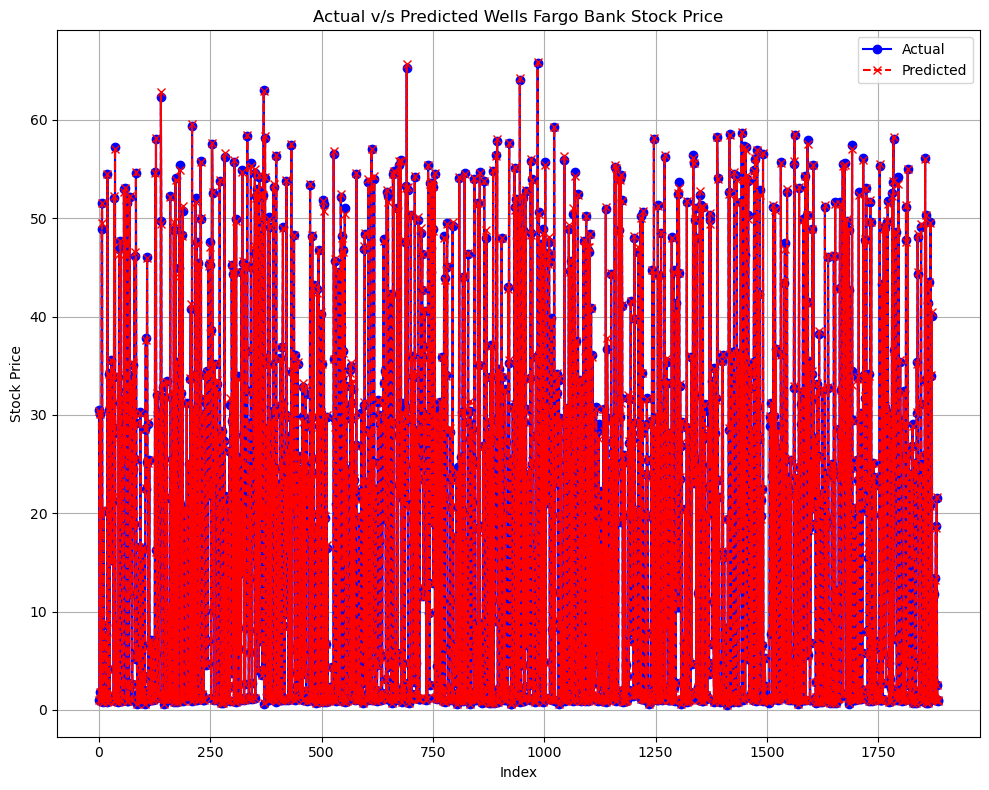

In [18]:
# Prediction on Testing set
pred = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.plot(range(len(y_test)), y_test, label="Actual", color="blue", linestyle="-", marker="o")
plt.plot(range(len(y_pred_test)), y_pred_test, label="Predicted", color="red", linestyle="--", marker="x")
plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.title("Actual v/s Predicted Wells Fargo Bank Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


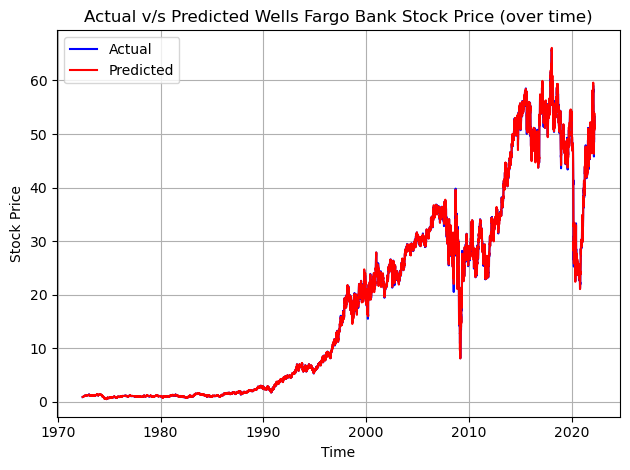

In [19]:
# Training + Testing set
y_pred_all = model.predict(x)

plt.plot(df['Date'], y, label="Actual", color='blue')
plt.plot(df['Date'], y_pred_all, label="Predicted", color='red')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual v/s Predicted Wells Fargo Bank Stock Price (over time)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Calculates RSI to measure price momentum and identify overbought or oversold market conditions
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))


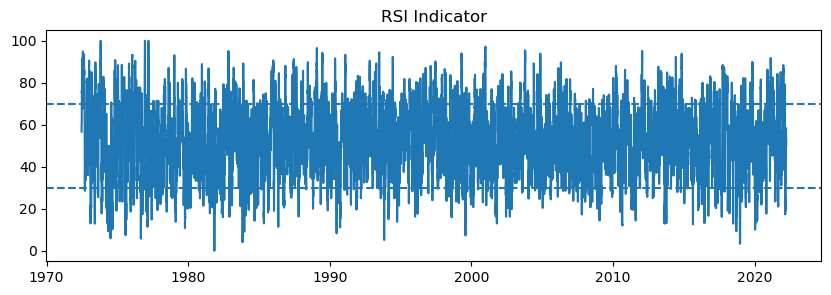

In [31]:
plt.figure(figsize=(10,3))
plt.plot(df['Date'], df['RSI'])
plt.axhline(70, linestyle='--')
plt.axhline(30, linestyle='--')
plt.title("RSI Indicator")
plt.show()
